In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Dataset

In [57]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


# Data Preprocessing

In [58]:
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

In [59]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [60]:
num_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
cat_cols = ['Extracurricular Activities']

In [61]:
scaler = StandardScaler().fit(X_train[num_cols])
ohe = OneHotEncoder(drop='first', sparse_output=False).fit(X_train[cat_cols])

In [62]:
def preprocess_manual(X):
    num_scaled = scaler.transform(X[num_cols])
    cat_encoded = ohe.transform(X[cat_cols])
    return np.hstack([num_scaled, cat_encoded])

In [63]:
X_train_m = preprocess_manual(X_train)
X_val_m = preprocess_manual(X_val)
X_test_m = preprocess_manual(X_test)

# From-Scratch Multiple Linear Regression (Normal Equation)

In [64]:
X_train_b = np.hstack([np.ones((X_train_m.shape[0], 1)), X_train_m])

In [65]:
theta = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train.values

In [66]:
def predict_manual(X_m):
    X_b = np.hstack([np.ones((X_m.shape[0], 1)), X_m])
    return X_b @ theta

In [67]:
y_pred_train = predict_manual(X_train_m)
y_pred_test_manual = predict_manual(X_test_m)

# Scikit-Learn Multiple Linear Regression

In [68]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

In [69]:
model_sk = Pipeline([
    ('preprocessing', preprocessor),
    ('lr', LinearRegression())
])

In [70]:
model_sk.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Hours Studied',
                                                   'Previous Scores',
                                                   'Sleep Hours',
                                                   'Sample Question Papers '
                                                   'Practiced']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Extracurricular '
                                                   'Activities'])])),
                ('lr', LinearRegression())])

In [71]:
y_pred_test_sk = model_sk.predict(X_test)

# Evaluation and Visualization

In [72]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name}:\nMSE = {mse:.2f}, R² = {r2:.2f}\n')

In [73]:
evaluate_model(y_test, y_pred_test_manual, 'Manual Linear Regression')
evaluate_model(y_test, y_pred_test_sk, 'Scikit-Learn Linear Regression')

Manual Linear Regression:
MSE = 4.07, R² = 0.99

Scikit-Learn Linear Regression:
MSE = 4.07, R² = 0.99



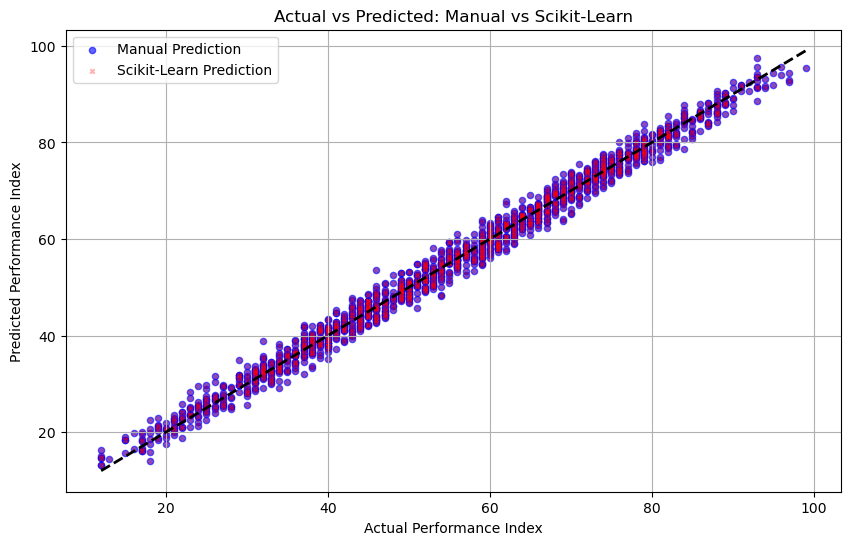

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_manual, label='Manual Prediction', color='blue', s=20, alpha=0.6, marker='o')
plt.scatter(y_test, y_pred_test_sk, label='Scikit-Learn Prediction', color='red', s=10, alpha=0.3, marker='x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted: Manual vs Scikit-Learn')
plt.legend()
plt.grid(True)
plt.show()